<h1>Problem 1</h1>

Write a function <b>complement</b> that takes a predicate function <b>p</b> of two arguments of any type (a predicate function is a function that returns true or false) and returns a function that takes the same two arguments but returns the complement of p. For example,

if <b>p(2,"Valid")</b> returns true then <b>complement(p)(2,"Valid")</b> should return false

if <b>p(2,"Valid")</b> returns false then <b>complement(p)(2,"Valid")</b> should return true



In [16]:
def complement[A](fun:(A,A) => Boolean)(a:A,b:A) : Boolean = {
    (!(fun(a,b)))
}

complement: [A](fun: (A, A) => Boolean)(a: A, b: A)Boolean


<h3>Test case 1</h3>

<h4>Use complement to create a function of two arguments that returns true if the second number is not the square of the first number. I.e.:</h4>

<span style="color:red">complement(f)(4,16)</span> should return false 

<span style="color:red">complement(f)(4,17)</span> should return true

<b>Make sure you use an anonymous function in place of f</b>

In [17]:
val r1 = complement(((x: Int,y: Int)=> (y==(x*x))))(4,16)
val r4 = complement(((x: Int,y: Int)=> (y==(x*x))))(4,17)

r1: Boolean = false
r4: Boolean = true


<h3>Test case 2</h3>
<h4>Use complement as the function to test whether two arrays are not sorted by length. Two arrays are sorted by length if the first array is strictly shorted than the second array.</h4>

Example: 

<span style="color:red">complement(f)(Array(1,2,3,4),Array(2,3,4,5,7))</span> should return false

<span style="color:red">complement(f)(Array(1,2,3,4),Array(2,3,4,5))</span> should return true

In [18]:
val r2 = complement((x:Array[Int], y:Array[Int]) => x.length<y.length)(Array(1,2,3,4),Array(2,3,4,5,7))
val r3 = complement((x:Array[Int], y:Array[Int]) => x.length<y.length)(Array(1,2,3,4),Array(2,3,4,5))

r2: Boolean = false
r3: Boolean = true


<h1>Problem 2</h1>

A Binary Tree can be defined by a set of nodes, each of which contain a value and a reference to a left node and a right node. The definition of a binary tree for an arbitrary data type is partially written for you below. Complete the definition of the node class and write out the functions in the object program. Note that all the functions are recursive (but not necessarily tail recursive). 

* <b>numNodes</b> The total number of nodes in the tree. For the example tree below, the number of nodes is 9

* <b>maxDepth</b> The maximum tree depth. An empty tree has the depth of 0. A tree with one node has a depth of 1. For the example tree below, the max depth is 6

* <b>fold</b> The result of applying a function to the tree. The fold function should take two arguments, a tree with elements of type A and a second argument of type B, and applies a function f, returning a value of type B. 

Examples of how each each function will be called is given below. You must construct the Tree outlined in the figure below and use that for the first set of tests

In [1]:
sealed trait Tree[+A]
case class Leaf[A]() extends Tree[A]
case class Node[A](value: A, left: Tree[A], right: Tree[A]) extends Tree[A]

object Tree {
    
    def numNodes[A](nn: Tree[A]): Int = nn match{
      case Leaf() => 0
      case Node(a,b,c) => 1 + numNodes(b) + numNodes(c)
    }
        
    
    def maxDepth[A](nn: Tree[A]): Int = nn match{
        case Leaf() => 0
        case Node(a,Leaf(),Leaf()) => 1
        case Node(a,b,c) => {if (maxDepth(b)>maxDepth(c)) 1+maxDepth(b)
                            else 1+maxDepth(c)}
    }
    
    
    def fold[A,B](nn: Tree[A], pp:B)(func:(A,B) => B): B = nn match{
        case Leaf() => pp
        case Node(a,b,c) => {func(a,fold(b,fold(c,pp)(func))(func))}
        
    }
    
}

Intitializing Scala interpreter ...

Spark Web UI available at http://192.168.86.26:4042
SparkContext available as 'sc' (version = 2.4.0, master = local[*], app id = local-1551141415279)
SparkSession available as 'spark'


defined trait Tree
defined class Leaf
defined class Node
defined object Tree


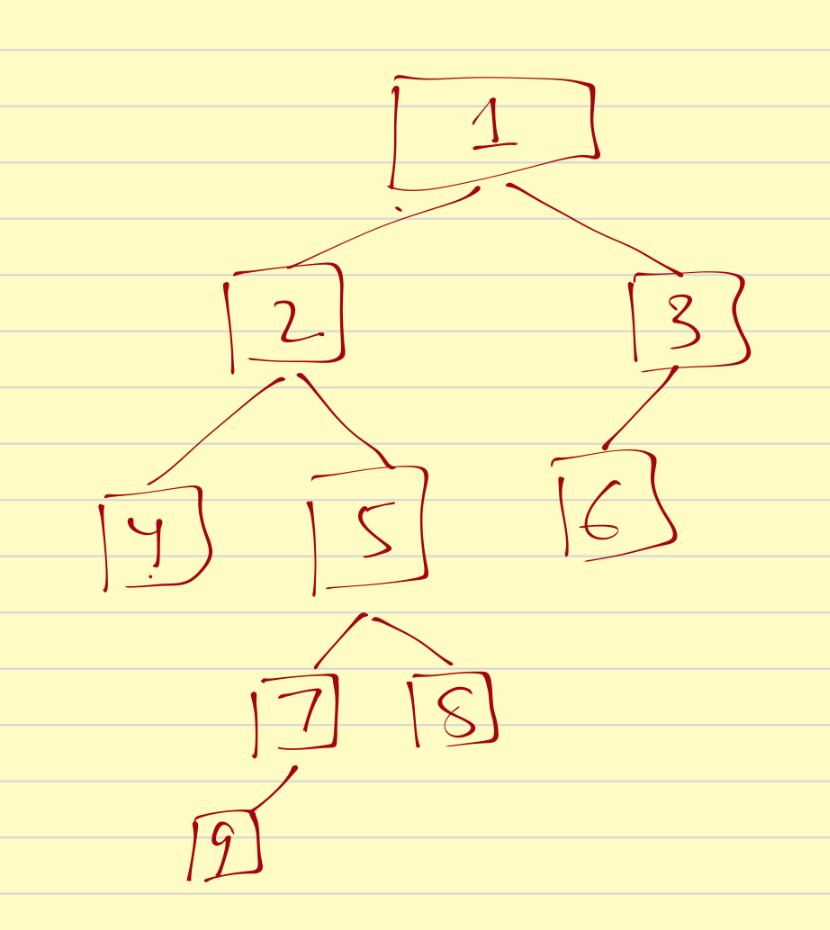

In [2]:
%%python
import matplotlib
matplotlib.use("agg")
from IPython.display import Image
with open("C:/Users/endwy/Documents/Columbia MSBA/Spring 2019/E4526 - Analytics on the Cloud/Assignments/tree.png") as fo:
    retval = Image(filename=fo.name)

<h3>Testing numNodes, maxDepth and fold</h3>

In [19]:
val t1 = Node(1,
             Node(2,
                 Node(4,Leaf(),Leaf()),
                 Node(5,
                     Node(7,
                         Node(9,Leaf(),Leaf()),
                         Leaf()),
                     Node(8,Leaf(),Leaf()))),
             Node(3,
                 Node(6,Leaf(),Leaf()),
                 Leaf()))

val r1 = Tree.numNodes(t1) //9 nodes
val r2 = Tree.maxDepth(t1) //5 maxdepth
val r3 = Tree.fold(t1,1)((x,y) => (x*y)) // returns 362880
val r4 = Tree.fold(t1,0)((x,y) => x+y) // returns 45


t1: Node[Int] = Node(1,Node(2,Node(4,Leaf(),Leaf()),Node(5,Node(7,Node(9,Leaf(),Leaf()),Leaf()),Node(8,Leaf(),Leaf()))),Node(3,Node(6,Leaf(),Leaf()),Leaf()))
r1: Int = 9
r2: Int = 5
r3: Int = 362880
r4: Int = 45


<h3>Additional test cases</h3>

Test fold on the following three cases:

1. Given a Tree with String elements, return the total length of all the strings in the tree

2. Given a Tree with String elements, return the number of strings that start with the letter J

3. Given a Tree with String elements, return the value of the node with the greates number of characters (break ties arbitrarily)


<h3>Test tree for string cases</h3>

In [7]:
//val t2 = Node("John", Node("James", Leaf(), Node("Vladimir", Node("Syliva",Leaf(),Node("Jill",Leaf(),Leaf())), Node("Chandini",Leaf(),Leaf()))), Leaf())

val t2 = Node("John",
            Node("James",
                 Leaf(),
                 Node("Vladimir",
                      Node("Syliva",
                           Leaf(),
                           Node("Jill",Leaf(),Leaf())),
                      Node("Chandini",Leaf(),Leaf()))),
            Leaf())

//1. Should return 35
//2. Should return 3
//3. Should return "Chandini" or "Vladimir" (Chandini will be easier!)

t2: Node[String] = Node(John,Node(James,Leaf(),Node(Vladimir,Node(Syliva,Leaf(),Node(Jill,Leaf(),Leaf())),Node(Chandini,Leaf(),Leaf()))),Leaf())


In [22]:
val r5 = Tree.fold(t2,0)((x,y)=>x.length+y) //35
val r6 = Tree.fold(t2,0)((x,y)=>{if (x.startsWith("J")) 1+y
                                 else y}) //3
val r7 = Tree.fold(t2,"")((x,y)=>{if (x.length>y.length) x
                                else y}) //Chandini


r5: Int = 35
r6: Int = 3
r7: String = Chandini
